<a href="https://colab.research.google.com/github/Ajitabh-12-7/Capstone-Gen-AI/blob/main/capstone_gen_ai_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Train shape: (120000, 3)
Test shape: (7600, 3)
   Class                                              Title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  
Missing values in train:
 Class          0
Title          0
Description    0
dtype: int64
Missing values in test:
 Class          0
Title          0
Description    0
dtype: int64
   Class                               

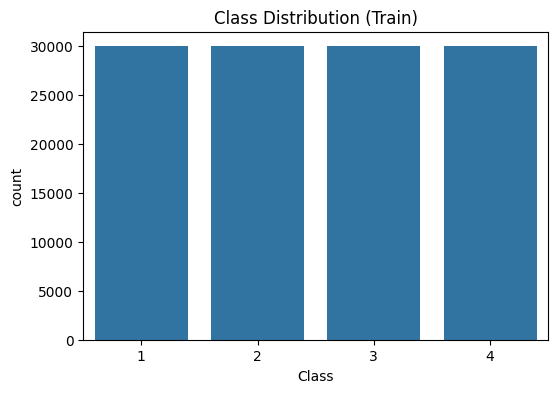

In [2]:
#Data Preparation
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# Use skiprows=1 to skip the header row directly from the CSV
train = pd.read_csv('/content/drive/My Drive/AGNews/train.csv', skiprows=1, names=['Class', 'Title', 'Description'])
test = pd.read_csv('/content/drive/My Drive/AGNews/test.csv', skiprows=1, names=['Class', 'Title', 'Description'])

# Convert 'Class' column to numeric
# Using errors='coerce' to turn any non-numeric values into NaN, though skiprows should prevent this
train['Class'] = pd.to_numeric(train['Class'], errors='coerce')
test['Class'] = pd.to_numeric(test['Class'], errors='coerce')

# Drop any rows where 'Class' became NaN due to coercion (shouldn't happen with skiprows=1 if data is clean)
train.dropna(subset=['Class'], inplace=True)
test.dropna(subset=['Class'], inplace=True)

# Convert 'Class' to integer type after ensuring no NaNs
train['Class'] = train['Class'].astype(int)
test['Class'] = test['Class'].astype(int)

# Inspect the shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Display first few rows to check data
print(train.head())

# Check for missing values
print("Missing values in train:\n", train.isnull().sum())
print("Missing values in test:\n", test.isnull().sum())

# Simple cleaning function (expand as needed)
def clean_text(text):
    import re
    if pd.isna(text): # Handle potential NaN values after dropping rows
        return ""
    text = str(text).lower()                            # Lowercase and ensure string
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)     # Remove special chars
    return text

train['Title'] = train['Title'].apply(clean_text)
train['Description'] = train['Description'].apply(clean_text)
test['Title'] = test['Title'].apply(clean_text)
test['Description'] = test['Description'].apply(clean_text)

# Show sample data
print(train.head())

# Bar plot of class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=train)
plt.title('Class Distribution (Train)')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                               Title  \
0     wall st bears claw back into the black reuters   
1  carlyle looks toward commercial aerospace reuters   
2       oil and economy cloud stocks outlook reuters   
3  iraq halts oil exports from main southern pipe...   
4  oil prices soar to alltime record posing new m...   

                                        Title_tokens  
0      [wall, st, bears, claw, back, black, reuters]  
1  [carlyle, looks, toward, commercial, aerospace...  
2    [oil, economy, cloud, stocks, outlook, reuters]  
3  [iraq, halts, oil, exports, main, southern, pi...  
4  [oil, prices, soar, alltime, record, posing, n...  


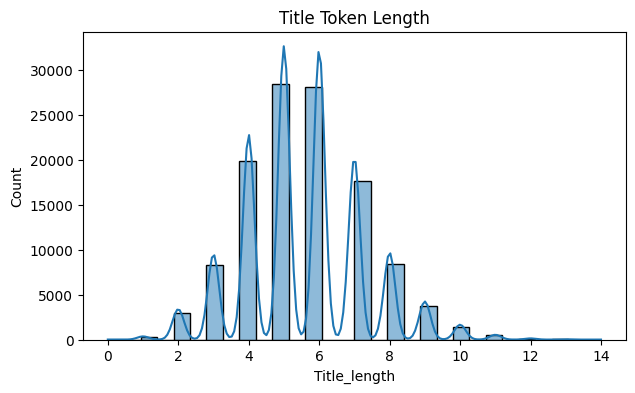

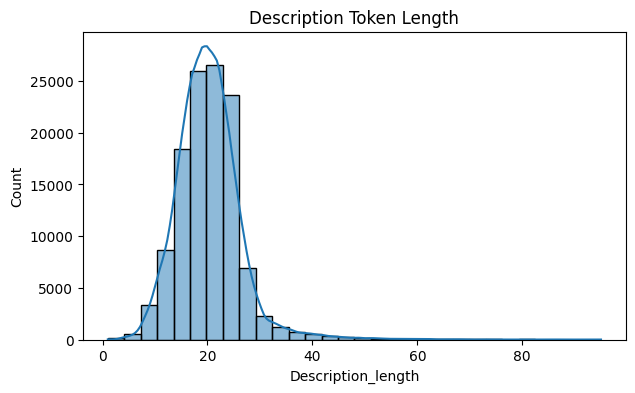

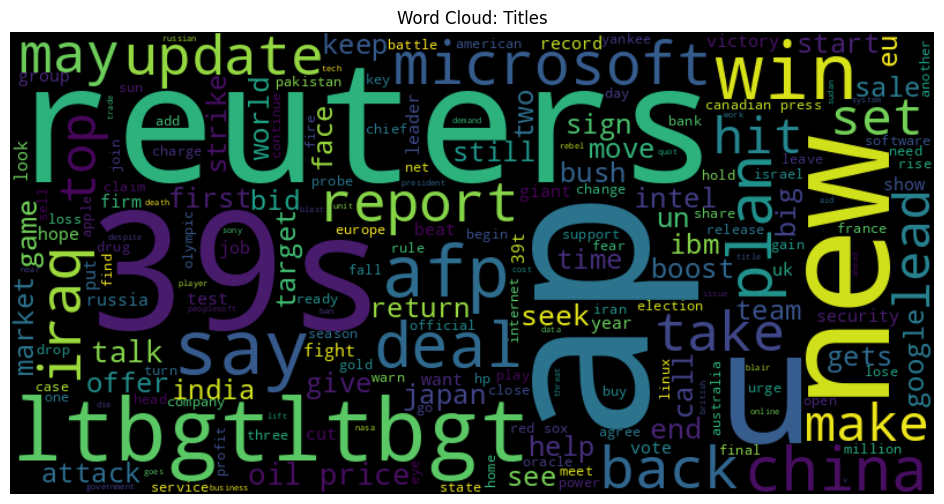

In [3]:
#Text Processing
#Lowercase text (if not yet done),
#Remove special characters (if not yet done),
#Tokenize titles and descriptions,
#Optionally remove stopwords.
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to download the missing resource
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a basic clean & tokenize function
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply to Title and Description columns, storing as new columns
train['Title_tokens'] = train['Title'].apply(clean_and_tokenize)
train['Description_tokens'] = train['Description'].apply(clean_and_tokenize)
test['Title_tokens'] = test['Title'].apply(clean_and_tokenize)
test['Description_tokens'] = test['Description'].apply(clean_and_tokenize)

# Check the result
print(train[['Title', 'Title_tokens']].head())

# Assuming tokenization from before
train['Title_length'] = train['Title_tokens'].apply(len)
train['Description_length'] = train['Description_tokens'].apply(len)

# Token length plot
plt.figure(figsize=(7,4))
sns.histplot(train['Title_length'], bins=30, kde=True)
plt.title('Title Token Length')
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(train['Description_length'], bins=30, kde=True)
plt.title('Description Token Length')
plt.show()

# Word Cloud of Title tokens
from wordcloud import WordCloud

def tokens_to_text(token_list_col):
    return ' '.join([word for tokens in token_list_col for word in tokens])

text = tokens_to_text(train['Title_tokens'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Titles')
plt.show()


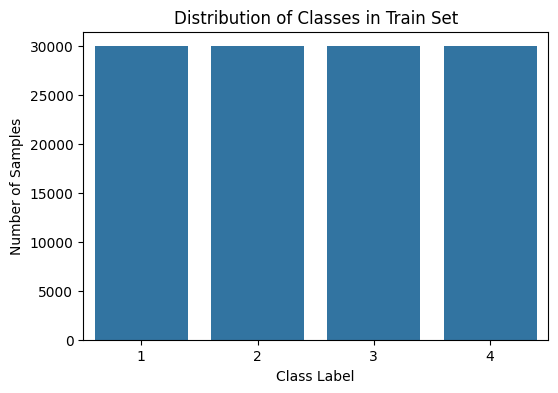

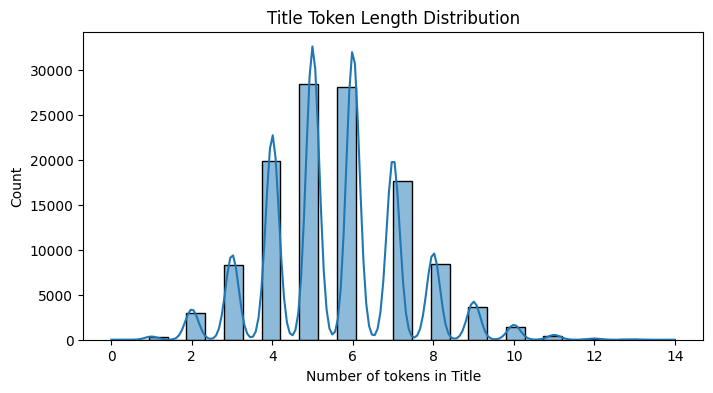

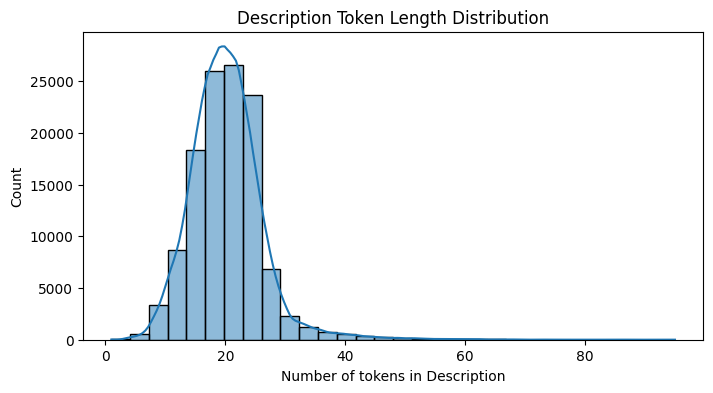

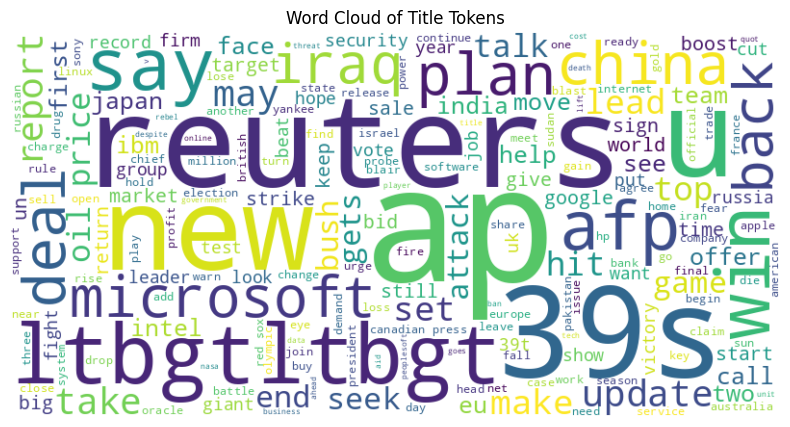

Bag-of-Words feature shape: (120000, 50)


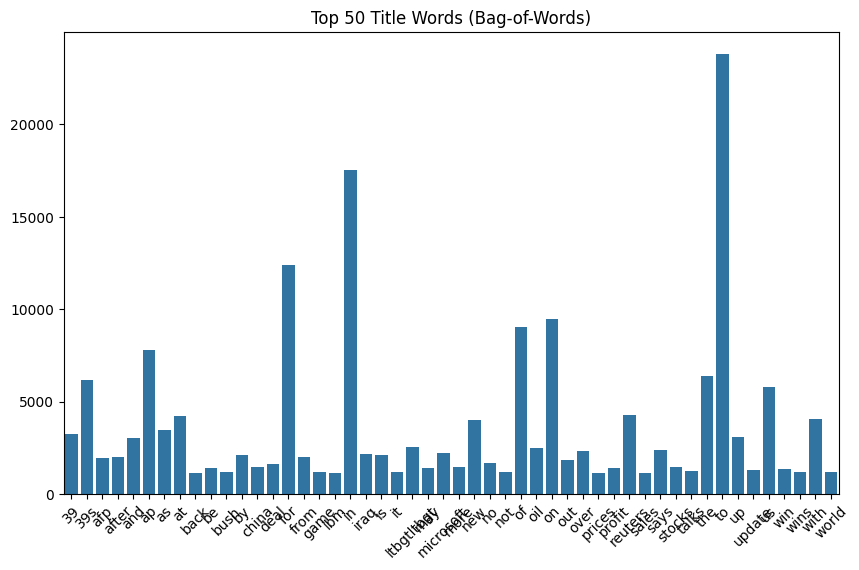

In [4]:
#visualize key preprocessing outputs and distributions after tokenization
#Bar plot of how many samples per class label.
#Histograms for token lengths in titles and descriptions.
#Word cloud for most frequent title tokens.
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=train)
plt.title('Distribution of Classes in Train Set')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.show()

# 2. Visualize article length (number of tokens)
train['Title_length'] = train['Title_tokens'].apply(len)
train['Description_length'] = train['Description_tokens'].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(train['Title_length'], bins=30, kde=True)
plt.title('Title Token Length Distribution')
plt.xlabel('Number of tokens in Title')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(train['Description_length'], bins=30, kde=True)
plt.title('Description Token Length Distribution')
plt.xlabel('Number of tokens in Description')
plt.show()

# 3. Word cloud for most frequent words in titles
from wordcloud import WordCloud

def tokens_to_text(token_list_col):
    return ' '.join([word for tokens in token_list_col for word in tokens])

text_for_wordcloud = tokens_to_text(train['Title_tokens'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Tokens')
plt.show()

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50)
X_title_bow = vectorizer.fit_transform(train['Title'])

# Show shape of feature matrix
print("Bag-of-Words feature shape:", X_title_bow.shape)

# Most frequent words
words = vectorizer.get_feature_names_out()
freqs = X_title_bow.sum(axis=0).A1

plt.figure(figsize=(10,6))
sns.barplot(x=words, y=freqs)
plt.xticks(rotation=45)
plt.title('Top 50 Title Words (Bag-of-Words)')
plt.show()


**Bag of Words**

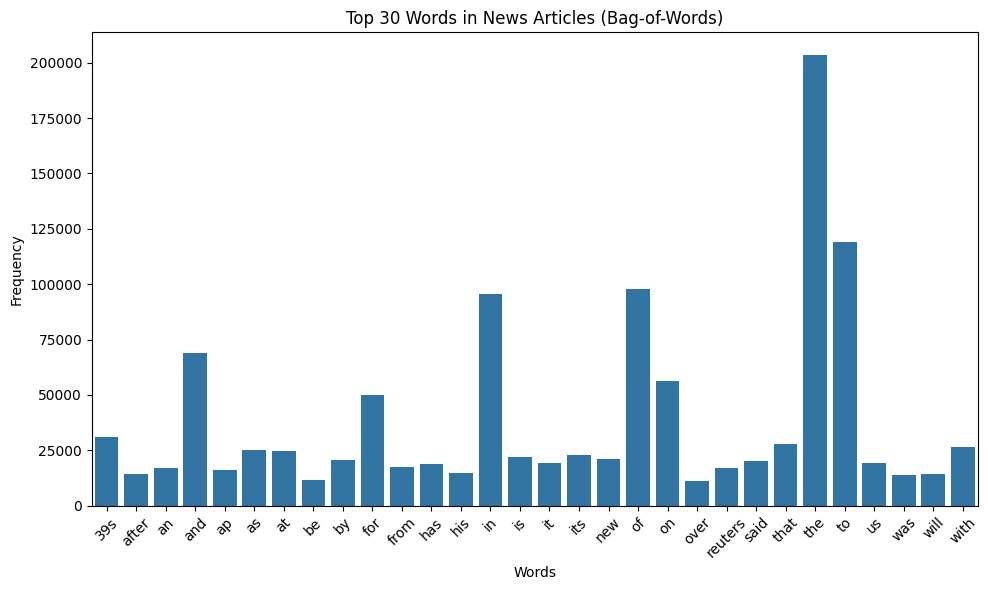

Bag-of-Words feature matrix shape: (120000, 30)
Bag-of-Words vector (sample): [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 1 0 0 0 0 0]]


In [5]:
#Bag of Words (Vectorization)
#Vectorizes articles into numeric arrays (Bag-of-Words).
#Plots top 30 most frequent words.
#Displays matrix shape and a sample feature vector.
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Combine title and description for richer features
train['text'] = train['Title'] + ' ' + train['Description']

# Create Bag-of-Words features
vectorizer = CountVectorizer(max_features=30)
X_bow = vectorizer.fit_transform(train['text'])

# Get feature (word) names and their total frequency
words = vectorizer.get_feature_names_out()
freqs = X_bow.sum(axis=0).A1

# Bar plot for most common words in Bag-of-Words representation
plt.figure(figsize=(10,6))
sns.barplot(x=words, y=freqs)
plt.xticks(rotation=45)
plt.title('Top 30 Words in News Articles (Bag-of-Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Show Bag-of-Words matrix shape
print("Bag-of-Words feature matrix shape:", X_bow.shape)

# Optionally show a sample of Bag-of-Words features for first row
print("Bag-of-Words vector (sample):", X_bow[0].toarray())

In [ ]:
#Word2Vec
#Generate average Word2Vec vectors for each article
#Reduce them to 2D using PCA
#Visualize how the articles cluster by topic.
!pip install gensim --quiet

from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare data for gensim (list of token lists)
sentences = train['Title_tokens'].tolist() + train['Description_tokens'].tolist()

# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Function to average word vectors for each row
def average_vector(tokens, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec

# Create average vectors for each article (using title + description tokens)
train['tokens'] = train['Title_tokens'] + train['Description_tokens']
X_w2v = np.vstack(train.apply(lambda row: average_vector(row['tokens'], w2v_model, 100), axis=1))

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_w2v)

# Visualize Word2Vec vectors by class
plt.figure(figsize=(10,7))
scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=train['Class'], cmap='tab10', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Word2Vec Embeddings (2D PCA Projection) by News Class')
plt.colorbar(scatter, label='Class')
plt.show()

# Print shape as a check
print("Word2Vec article matrix shape:", X_w2v.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 77.0 MB/s eta 0:00:00


**Glove Implementation**

In [ ]:
# Download GloVe (6B tokens, 100d vectors)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip


In [ ]:
import numpy as np

# Load GloVe vectors
def load_glove(file_path):
    glove = {}
    with open(file_path, encoding='utf8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vec = np.array(parts[1:], dtype='float32')
            glove[word] = vec
    return glove

glove_vectors = load_glove('glove.6B.100d.txt')


In [ ]:
#Generate average GloVe article vector
def average_glove_vector(tokens, glove, vector_size=100):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in glove:
            vec += glove[word]
            count += 1
    return vec / count if count > 0 else vec

X_glove = np.vstack(train['tokens'].apply(lambda tokens: average_glove_vector(tokens, glove_vectors, 100)))
print("GloVe article matrix shape:", X_glove.shape)


In [ ]:
#Visualize with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_glove_2d = pca.fit_transform(X_glove)

plt.figure(figsize=(10,7))
scatter = plt.scatter(X_glove_2d[:,0], X_glove_2d[:,1], c=train['Class'], cmap='tab10', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('GloVe Embeddings (2D PCA Projection) by News Class')
plt.colorbar(scatter, label='Class')
plt.show()


**BERT**

In [ ]:
!pip install -q sentence-transformers

In [ ]:
#this section is commented out because BERT and similar transformer models do heavy computations on every text entry and my dataset is large (AG News typically has 120K+ items).
#Encoding text with BERT requires processing each sample through the model, which is slow, especially on CPU (faster on GPU, but still takes time).
#from this line below is the code!!!
#Generate BERT embeddings for news articles
#from sentence_transformers import SentenceTransformer
#import numpy as np

# Use mini model for speed; you can switch to 'all-MiniLM-L6-v2' for quality
#model = SentenceTransformer('all-MiniLM-L6-v2')

# Use either title, description, or concatenation for encoding
#text_data = (train['Title'] + " " + train['Description']).tolist()
#bert_embeddings = model.encode(text_data, show_progress_bar=True)
#print("BERT article matrix shape:", bert_embeddings.shape)


In [ ]:
# Sample only first 2000 articles for very fast execution (change as needed)
sample_data = (train['Title'] + " " + train['Description']).tolist()[:2000]
bert_embeddings_sample = model.encode(sample_data, show_progress_bar=True)
print("BERT sample matrix shape:", bert_embeddings_sample.shape)


In [ ]:
#This code will provide the visual representation of bert if used with full capacity
#Reduce embeddings to 2D using PCA and visualize
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt


#pca = PCA(n_components=2)
#X_bert_2d = pca.fit_transform(bert_embeddings)


#plt.figure(figsize=(10,7))
#scatter = plt.scatter(X_bert_2d[:,0], X_bert_2d[:,1], c=train['Class'], cmap='tab10', alpha=0.5)
#plt.xlabel('PCA1')
#plt.ylabel('PCA2')
#plt.title('BERT Embeddings (2D PCA Projection) by News Class')
#plt.colorbar(scatter, label='Class')
#plt.show()

In [ ]:
#sample is used so the visual represtentation is less dense just to give an idea
#Reduce embeddings to 2D using PCA and visualize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
X_bert_2d_sample = pca.fit_transform(bert_embeddings_sample)

# Only use the first 2000 class labels!
sample_labels = train['Class'][:2000]

plt.figure(figsize=(10,7))
scatter = plt.scatter(X_bert_2d_sample[:,0], X_bert_2d_sample[:,1], c=sample_labels, cmap='tab10', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('BERT Embeddings (2D PCA Projection, Sample) by News Class')
plt.colorbar(scatter, label='Class')
plt.show()


**Model Training & Visual Evaluation (Classification and Confusion Matrix)**

In [ ]:
#Bag of Words
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use X_bow from previous Bag-of-Words step and class labels
clf = LogisticRegression(max_iter=500)
clf.fit(X_bow, train['Class'])

# Predict on training set (for demonstration, normally you use test set)
pred_train = clf.predict(X_bow)

# Classification report
print("Classification Report (Train):\n", classification_report(train['Class'], pred_train))

# Confusion matrix
cm = confusion_matrix(train['Class'], pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Bag-of-Words (Train)')
plt.show()


In [ ]:
# Make sure you already have train['Title_tokens'] and train['Description_tokens']

from gensim.models import Word2Vec
import numpy as np

# Combine token lists for model training
sentences = train['Title_tokens'].tolist() + train['Description_tokens'].tolist()

# Train Word2Vec model (vector_size=100 is common)
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Create average Word2Vec vector per article (using both title and description tokens)
def average_vector(tokens, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec

train['tokens'] = train['Title_tokens'] + train['Description_tokens']
X_w2v = np.vstack(train['tokens'].apply(lambda tokens: average_vector(tokens, w2v_model, 100)))

print("X_w2v shape:", X_w2v.shape)


In [ ]:
#Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_w2v = LogisticRegression(max_iter=500)
clf_w2v.fit(X_w2v, train['Class'])
pred_train_w2v = clf_w2v.predict(X_w2v)

# Performance metrics
print("Classification Report (Word2Vec, Train):\n", classification_report(train['Class'], pred_train_w2v))

cm_w2v = confusion_matrix(train['Class'], pred_train_w2v)
disp_w2v = ConfusionMatrixDisplay(confusion_matrix=cm_w2v)
disp_w2v.plot(cmap='Blues')
plt.title('Confusion Matrix: Word2Vec (Train)')
plt.show()


In [ ]:
#Glove
clf_glove = LogisticRegression(max_iter=500)
clf_glove.fit(X_glove, train['Class'])
pred_train_glove = clf_glove.predict(X_glove)

print("Classification Report (GloVe, Train):\n", classification_report(train['Class'], pred_train_glove))

cm_glove = confusion_matrix(train['Class'], pred_train_glove)
disp_glove = ConfusionMatrixDisplay(confusion_matrix=cm_glove)
disp_glove.plot(cmap='Blues')
plt.title('Confusion Matrix: GloVe (Train)')
plt.show()


In [ ]:
#this code will work with bert on full capacity
#clf_bert = LogisticRegression(max_iter=500)
#clf_bert.fit(bert_embeddings, train['Class'])
#pred_train_bert = clf_bert.predict(bert_embeddings)

#print("Classification Report (BERT, Train):\n", classification_report(train['Class'], pred_train_bert))

#cm_bert = confusion_matrix(train['Class'], pred_train_bert)
#disp_bert = ConfusionMatrixDisplay(confusion_matrix=cm_bert)
#disp_bert.plot(cmap='Blues')
#plt.title('Confusion Matrix: BERT (Train)')
#plt.show()


In [ ]:
#Again used with sample to give an idea
#BERT
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use only the first 2000 class labels too!
sample_labels = train['Class'][:2000]

clf_bert = LogisticRegression(max_iter=500)
clf_bert.fit(bert_embeddings_sample, sample_labels)
pred_train_bert = clf_bert.predict(bert_embeddings_sample)

print("Classification Report (BERT, Train):\n", classification_report(sample_labels, pred_train_bert))

cm_bert = confusion_matrix(sample_labels, pred_train_bert)
disp_bert = ConfusionMatrixDisplay(confusion_matrix=cm_bert)
disp_bert.plot(cmap='Blues')
plt.title('Confusion Matrix: BERT (Train Sample)')
plt.show()



| Objective                                                | Step(s) Executed In                            | How?                        |
| -------------------------------------------------------- | ---------------------------------------------- | --------------------------- |
| Automatically sort news articles into topics             | Step 7 (Model Training & Prediction)           | Classifier predicts topics  |
| Test and compare Bag-of-Words, Word2Vec, GloVe, and BERT | Step 3–7 (Feature Engineering, Modeling, Eval) | Compare models/features     |
| Find important text features for topics                  | Step 7 (+ feature analysis after)              | Coefficients/PCA/importance |
| Quickly organize news by topic                           | Step 7 (plus example inference)                | Batch prediction/inference  |